<a href="https://colab.research.google.com/github/modanmodern/modanmodern/blob/tensorflow-study/Parameter%20Adjustment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36830 (\N{CJK UNIFIED IDEOGRAPH-8FDE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32493 (\N{CJK UNIFIED IDEOGRAPH-7EED}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25351 (\N{CJK UNIFIED IDEOGRAPH-6307}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 34928 (\N{CJK UNIFIED IDEOGRAPH-8870}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

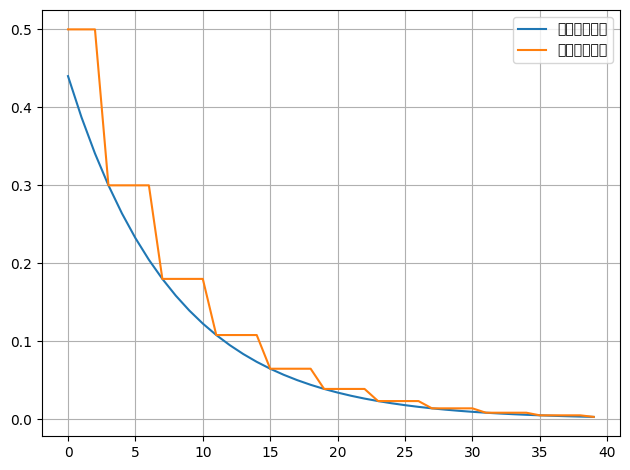

In [1]:
import numpy as np
import matplotlib.pyplot as plt


lr_base = 0.5  # 初始学习率
decay_rate = 0.6  # 指数衰减率
decay_step = 4  # 衰减步数

epoch = 10
batch = 4

lr, lr_stair = [], []  # 存储学习率变化
global_step = 0
for epoch in range(epoch):
    for step in range(batch):
        global_step += 1  # 统计迭代次数
        lr_temp = lr_base * decay_rate ** (global_step / decay_step)  # 连续学习率衰减
        lr_stair_temp = lr_base * decay_rate ** (np.floor(global_step / decay_step))  # 向下取整，阶梯衰减
        lr.append(lr_temp)
        lr_stair.append(lr_stair_temp)

fig, ax = plt.subplots(tight_layout=True)
ax.plot(lr, label='连续指数衰减')
ax.plot(lr_stair, label='阶梯指数衰减')
ax.legend(prop={'family':'SimHei'})
ax.grid()
plt.show()

In [4]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

**学习率（Learning Rate）**
学习率是深度学习中最重要的参数之一。它决定了模型在每次更新时所采用的权重大小。如果学习率设置得过大，可能会导致模型无法收敛；如果学习率设置得过小，则模型可能需要很长时间才能收敛，甚至可能无法收敛。
一般来说，较大的学习率可以加速模型的训练，但可能会导致模型震荡或者无法收敛。较小的学习率可以使得模型更稳定，但可能会使得模型训练速度变慢。因此，选择一个合适的learning rate是非常重要的。
通常通过随机搜索或者贝叶斯优化等方法进行learning rate的调优。
**批量大小（Batch Size）**
批量大小是指在每次更新时，所使用的样本数量。批量大小会影响模型的训练速度和收敛速度。较小的批量大小可以加速模型的训练，但可能会导致模型收敛到局部最优解。较大的批量大小可以使得模型更稳定，但可能会使得模型训练速度变慢。
在选择批量大小时，需要权衡速度和稳定性。通常情况下，我们会使用较小的批量大小来加速训练，然后在训练后期逐渐增加批量大小以提高模型的精度。
**迭代次数（Epochs）**
迭代次数是指整个数据集被训练的次数。迭代次数越多，模型对数据的拟合程度越好，但同时也会增加过拟合的风险。太少或者太多的迭代次数都会对模型的性能产生影响。
一般情况下，我们会先设置一个较小的迭代次数进行训练，然后在训练过程中逐步增加迭代次数。也可以通过设置早停（early stopping）或者学习率衰减（learning rate decay）等方式来控制模型的训练过程，防止过拟合。
**正则化参数（Regularization Parameters）**
正则化参数主要用于控制模型的复杂度，以减少过拟合的风险。常用的正则化参数包括L1正则化、L2正则化和Dropout等。
L1正则化可以使得模型更加稀疏，有助于提高模型的泛化能力；L2正则化则可以使得模型的权重更加均匀，有助于防止模型过度拟合训练数据；Dropout可以在训练过程中随机关闭部分神经元，以增加模型的泛化能力。
在调整正则化参数时，通常需要通过交叉验证等方式来选择合适的参数。例如，可以通过交叉验证来选择最佳的L1/**L2正则化比例或者Dropout比例。**